In [1]:
%reset -f 
%run -i /home/j2/Desktop/PythonTry/MLshm/python_functions/poly_formal_import

In [2]:
%run -i /home/j2/Desktop/PythonTry/MLshm/python_functions/poly_formal_arrayspacing

In [3]:
%run -i /home/j2/Desktop/PythonTry/MLshm/python_functions/zeplot

In [4]:
%run -i /home/j2/Desktop/PythonTry/MLshm/python_functions/poly_formal_headers

In [5]:
totalIndex = 0 # set to zero
%run -i /home/j2/Desktop/PythonTry/MLshm/python_functions/poly_formal_making_data

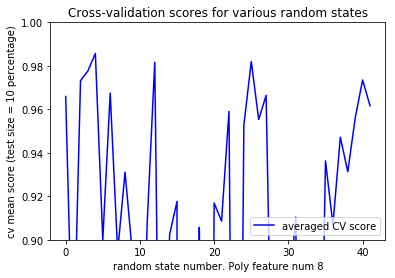

In [16]:
%run -i /home/j2/Desktop/PythonTry/MLshm/python_functions/poly_formal_headers
%run -i /home/j2/Desktop/PythonTry/MLshm/python_functions/poly_formal_fitting

In [12]:
try:
    os.makedirs(directory)
except OSError as e:
    if e.errno != errno.EEXIST:
        raise


In [13]:
directory

'/home/j2/Desktop/PythonTry/MLshm/Data/LSRTMv60MLv1/oput/poly/poly8'

In [14]:
clf = linear_model.LinearRegression()
clf.fit(X_train,Y3_train)
clfscore = clf.score(X_test, Y3_test) 

In [15]:
df[50:70]

,x (mm),y (mm),Area (mm^2),Length (mm),Width (mm),x_center,y_center,max value
50,18,26,882,40,33,0,-14,0.15322
51,18,30,896,40,33,0,-16,0.15226
52,18,34,946,42,33,0,-18,0.15056
53,18,38,1021,45,35,0,-20,0.14815
54,18,42,1066,44,37,0,-22,0.14652
55,22,2,444,21,29,0,2,0.23210
56,22,6,574,28,27,0,2,0.20642
57,22,10,756,33,29,0,7,0.13317
58,22,14,859,39,31,0,3,0.17219
59,22,18,939,43,33,0,12,0.14811


In [ ]:
X_train.shape 

In [ ]:
X_test.shape

In [ ]:
Y3_train.shape

In [ ]:
Y3_test.shape

In [ ]:
X_test.shape 

In [ ]:
X_test[0,:]

In [ ]:
flag_output_screen = 1

In [ ]:
clf.predict(X_test[1,:].reshape(1,-1))

In [ ]:
Y3_test[1,:]

In [ ]:
Xpoly_exp = poly.fit_transform([[ 23.,  10.]])

print(Xpoly_exp)

In [ ]:
Y_pred_exp = clf.predict(Xpoly_exp)

In [ ]:
Y_pred_exp.shape

In [ ]:
 Y_pred_exp

In [ ]:
Y[-4:]

In [ ]:
        
        #rect_ixx = 23
        #rect_iyy = 10
        
        Dxmm = 23  
        Dymm = 10

#         parafilename = '/home/j2/Desktop/PythonTry/MLshm/MLRTMwithExperiment/rectx%03dy%03d/iter00000/bnzlcc.csv' % (Dxmm,Dymm)
#         tempdf = pd.read_csv(parafilename,header=None)
        parafilename = '/home/j2/Desktop/PythonTry/MLshm/MLRTMwithExperiment/ExpRectx%03dy%03d/iter00000/bnzlcc.csv' % (Dxmm,Dymm)
        tempdf = pd.read_csv(parafilename,header=None)

        
# opencv filtering
        tempdfabs = abs(tempdf.values)
        filter_abs = cv2.filter2D(tempdfabs,-1,kernel)
        filter_abs_temp = filter_abs
        maxfilter_abs = filter_abs.max().max()
        max_hold = 1.00704665e-02/8.98344284e-02*Maxvalue
        #max_hold = maxfilter_abs*1.5 
        filter_abs_temp[filter_abs < thold*(max_hold)] = 0
        filter_abs_temp[:,:130] = 0
        
        
# [first D,second D,number of data] data stacking       
        image3D = np.dstack((image3D, filter_abs_temp)) 

        if flag_plot_gene == 1: 
            imagfilename = '/home/j2/Desktop/PythonTry/MLshm/oput/poly/feature_star%dthold%03d/filter%d.png' % (feature_star,(thold*100),totalIndex)
            fig = plt.figure()
            
            plt.imshow(ndimage.rotate(filter_abs_temp,90))

            plt.title('Dx = %d mm   Dy= %d mm' % (Dxmm,Dymm))
            plt.savefig(imagfilename,format='png', dpi=300)
            #plt.show()
            plt.close()

        LL = np.zeros([nnum,nnum])
        #LL[filter_abs > thold*maxfilter_abs] = 1
        LL[filter_abs > thold*(max_hold)] = 1

        P_area_num=LL.sum().sum()
        P_width = np.sum(LL,axis=0).max()
        P_length = np.sum(LL,axis=1).max()
        Pxy = unravel_index(filter_abs_temp.argmax(), filter_abs_temp.shape)  
        onerow = np.array([P_area_num,P_width,P_length,Pxy[0],Pxy[1],maxfilter_abs]).reshape((1,6))
        onerowX = np.array([Dxmm,Dymm]).reshape((1,2))
        X = np.append(X,onerowX,axis=0)
        Y = np.append(Y,onerow,axis=0)


In [ ]:
Y[-2:]

In [ ]:
Y_imaged = Y[-1,0:3].reshape(1,-1)
print(Y_imaged)
print(Y_imaged.shape)
Y_pred_exp = clf.predict(Xpoly_exp)
Y_pred_exp.shape
print(Y_pred_exp)
print(Y_pred_exp.shape)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred_exp, Y_imaged)

In [ ]:
clf.predict(Xpoly_exp)

In [ ]:
 clfscore = clf.score(X_test, Y3_test) 
    

In [ ]:
Y3_test

In [ ]:
X_test.shape

In [ ]:
Y3_test.shape

In [ ]:
clf = linear_model.LinearRegression()
clf.fit(X_train,Y3_train)
clfscore = clf.score(X_test[:], Y3_test[:]) 
    

textclfscore = ' clf score : ' + np.array_str(clfscore) + '\n'
clfscorestr = np.array_str(clfscore) + '\n'
print(textclfscore)    

In [ ]:
Y3_predict = clf.predict(X_test)

In [ ]:
Y3_predict

In [ ]:
Y3_test

In [ ]:
 Y3_predict/Y3_test  

In [ ]:
Y_pred_exp/Y_imaged

In [ ]:
clf_score_exp=clf.score(Xpoly_exp, Y_imaged) 
print(clf_score_exp)

In [ ]:
print("%.8f" % clf_score_exp) 

In [ ]:
Y_imaged

In [ ]:
Y[-1] 

In [ ]:
Y[-1,0:3]

In [ ]:
Y[-1,0:3]

In [ ]:
implt(filter_abs_temp)

In [ ]:
clfscorelist

In [ ]:
cv